**PREDICTING THE BEST ALGORITHM FOR CALCULATING CONCRETE STRENGTH BY MACHINE LEARNING**

# **Understanding the CSV File**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [2]:
pip install pyforest

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14605 sha256=024fb34e46e1f91be22fc8d2eb4f34a767d6fd7d5089882058dc5f83d816b395
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest


In [3]:
from pyforest import*
lazy_imports()

['from sklearn.linear_model import LassoCV',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn.preprocessing import MinMaxScaler',
 'import spacy',
 'import plotly.express as px',
 'import cv2',
 'import matplotlib as mpl',
 'import glob',
 'import nltk',
 'from PIL import Image',
 'from scipy import stats',
 'from xlrd import open_workbook',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import statistics',
 'from fbprophet import Prophet',
 'import bokeh',
 'from sklearn.linear_model import RidgeCV',
 'import altair as alt',
 'from sklearn.linear_model import LinearRegression',
 'import pickle',
 'from openpyxl import load_workbook',
 'from sklearn.linear_model import ElasticNet',
 'import imutils',
 'from sklearn.ensemble import RandomForestClassifier',
 'import seaborn as sns',
 'from sklearn.model_selection import train_test_split',
 'from sklearn.linear_model import ElasticNetCV',
 'from pathlib import Path',
 'import fbprophet',
 'import 

In [4]:
# importing csv file from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/concrete_data.csv')

<IPython.core.display.Javascript object>

In [6]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
# Rename df
df = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
                        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag',
                        'Fly Ash (component 3)(kg in a m^3 mixture)':'ash',
                        'Water (component 4)(kg in a m^3 mixture)':'water',
                        "Superplasticizer (component 5)(kg in a m^3 mixture)":'superplastic',
                        'Coarse Aggregate (component 6)(kg in a m^3 mixture)':'coarseagg',
                        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fineagg',
                        'Age (day)':'age',
                        'Concrete compressive strength(MPa, megapascals)':'strength'})

#Alternatively,I can use,
df.columns = ['cement', 'slag', 'ash', 'Water','superplastic','coarseagg','fineagg','age','strength']

In [8]:
df.head()

,cement,slag,ash,Water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
# to see the data types

df.dtypes

cement          float64
slag            float64
ash             float64
Water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [10]:
# to see the row and coloum

df.shape

(1030, 9)

In [11]:
# for ensuring any blank in the dataset

df.isnull().sum()

cement          0
slag            0
ash             0
Water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [12]:
#for understanding the max,min std etc.
# (.T) is for the orientation just, mainly df.describe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


# **Exploratory Data Analysis**


### CEMENT

In [15]:
#Quartiles
from scipy import stats

Q1=df['cement'].quantile(q=0.25)
Q3=df['cement'].quantile(q=0.75)

print('1st Quartile (Q1) is: ',Q1)
print('3rd Quartile (Q3) is: ',Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['cement']))

1st Quartile (Q1) is:  192.375
3rd Quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625


In [16]:
#Outlier detection from Interquartile range (IQR) in original data
#Insight : The IQR is useful for identifying the spread of the data and detecting outliers. Data points that lie below Q1-1.5*(Q3-Q1) or above Q3+1.5*(Q3-Q1) are often considered outliers

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('Lower outlier limit in cement: ',L_outliers)
print('Upper outlier limit in cement: ',U_outliers)

Lower outlier limit in cement:  -44.0625
Upper outlier limit in cement:  586.4375


In [17]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in cement upper: ', df[df['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower: ', df[df['cement']<-44.0625]['cement'].count())

Number of outliers in cement upper:  0
Number of outliers in cement lower:  0


<IPython.core.display.Javascript object>

<Axes: xlabel='cement'>

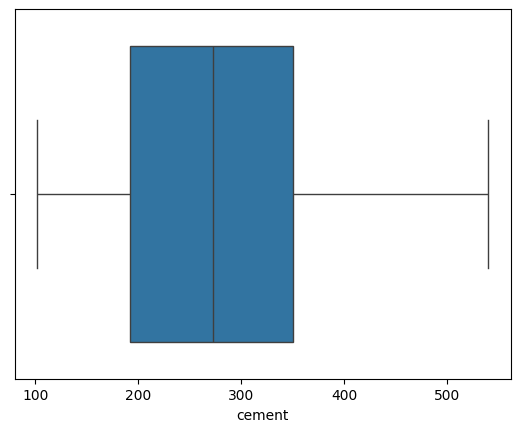

In [18]:
#Distribution of  by BOXPLOT (seaborn)
# 'h' stands for horizontal. If omitted, the default orientation is vertical.


sns.boxplot(x='cement',data=df, orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-19-2b27a9a2b611>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cement']).set_title('CEMENT')


<IPython.core.display.Javascript object>

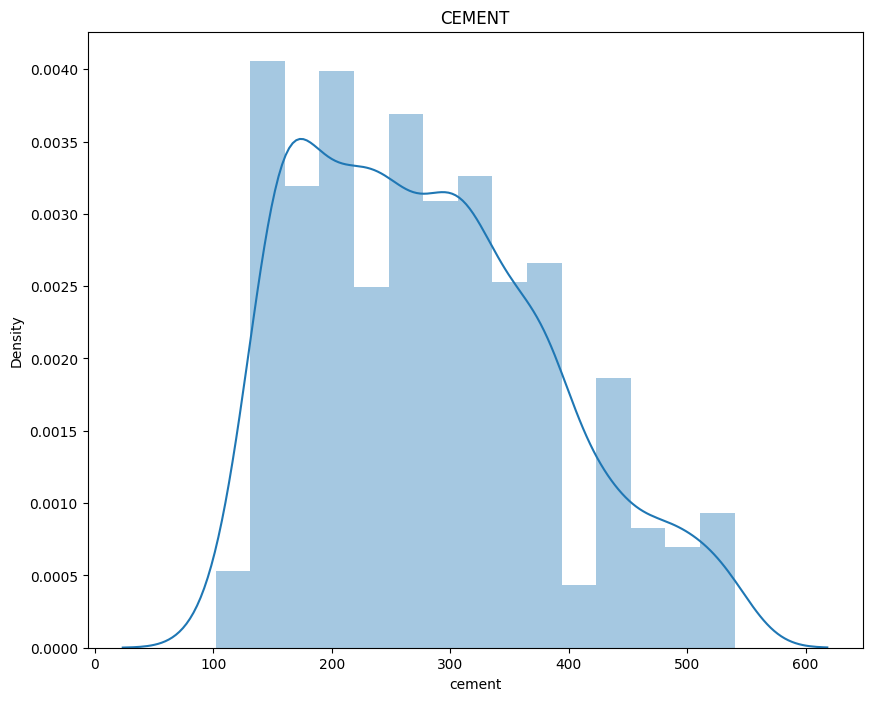

In [19]:
#displot
# by this plot from seaborn library, we clearly Spotting Potential Outliers

plt.figure(figsize=(10,8))
sns.distplot(df['cement']).set_title('CEMENT')
plt.show()

### SAME PROCESS FOR WATER

In [20]:
#Quartiles
Q1W = df['Water'].quantile(q=0.25)
Q3W = df['Water'].quantile(q=0.75)

print('1st Quartile is Q1: ', Q1W)
print('3rd Quartile is Q3: ', Q3W)
print('Interquartile range (IQR) is: ', stats.iqr(df['Water']))

1st Quartile is Q1:  164.9
3rd Quartile is Q3:  192.0
Interquartile range (IQR) is:  27.099999999999994


In [21]:
#Outlier detection from Interquartile range (IQR) in original data

WL_outliers=Q1W-1.5*(Q3W-Q1W)
WU_outliers=Q3W+1.5*(Q3W-Q1W)

print('Lower outlier in water: ',WL_outliers)
print('Upper outlier in water: ',WU_outliers)

Lower outlier in water:  124.25000000000001
Upper outlier in water:  232.64999999999998


In [22]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in water upper: ', df[df['Water']>232.64999999999998]['Water'].count())
print('Number of outliers in water lower: ', df[df['Water']<124.25000000000001]['Water'].count())

Number of outliers in water upper:  4
Number of outliers in water lower:  5


<IPython.core.display.Javascript object>

<Axes: xlabel='Water'>

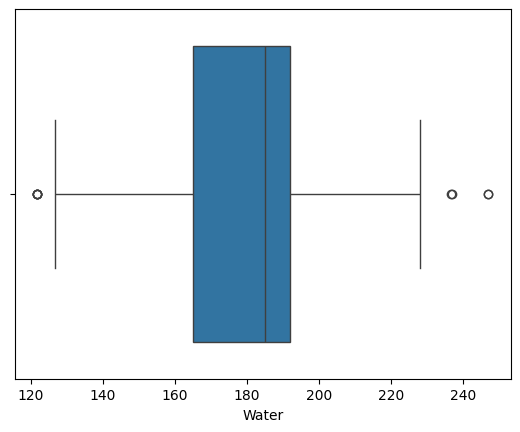

In [23]:
#Distribution of  by BOXPLOT (seaborn)
# 'h' stands for horizontal. If omitted, the default orientation is vertical.


sns.boxplot(x='Water',data=df, orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-24-f1631907856c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Water']).set_title('WATER')


<IPython.core.display.Javascript object>

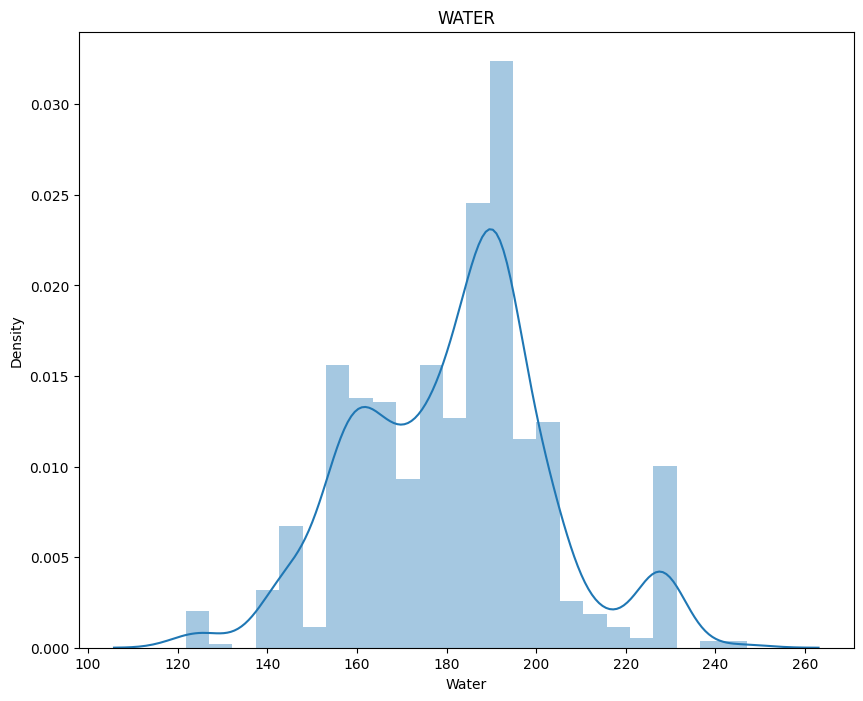

In [24]:
#displot for water
plt.figure(figsize=(10,8))
sns.distplot(df['Water']).set_title('WATER')
plt.show()

### blast_furnace_slag

In [25]:
#Quartiles
Q1W = df['slag'].quantile(q=0.25)
Q3W = df['slag'].quantile(q=0.75)

print('1st Quartile is Q1: ', Q1W)
print('3rd Quartile is Q3: ', Q3W)
print('Interquartile range (IQR) is: ', stats.iqr(df['slag']))

1st Quartile is Q1:  0.0
3rd Quartile is Q3:  142.95
Interquartile range (IQR) is:  142.95


In [26]:
#Outlier detection from Interquartile range (IQR) in original data

SL_outliers=Q1W-1.5*(Q3W-Q1W)
SU_outliers=Q3W+1.5*(Q3W-Q1W)

print('Lower outlier in SLAG: ',SL_outliers)
print('Upper outlier in SLAG: ',SU_outliers)

Lower outlier in SLAG:  -214.42499999999998
Upper outlier in SLAG:  357.375


In [27]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in SLAG upper: ', df[df['slag']>232.64999999999998]['slag'].count())
print('Number of outliers in SLAG lower: ', df[df['slag']<124.25000000000001]['slag'].count())

Number of outliers in SLAG upper:  55
Number of outliers in SLAG lower:  717


<IPython.core.display.Javascript object>

<Axes: xlabel='slag'>

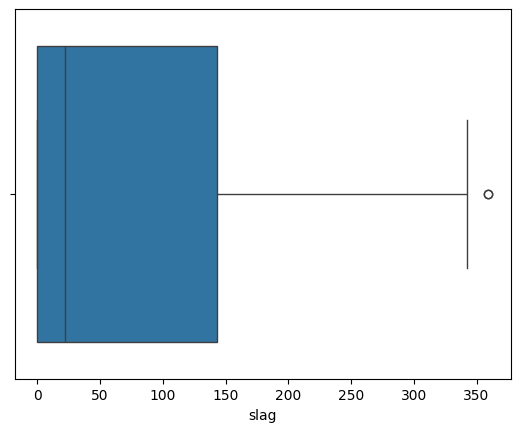

In [28]:
sns.boxplot(x='slag',data=df, orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-29-483787742e48>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['slag']).set_title('SLAG')


<IPython.core.display.Javascript object>

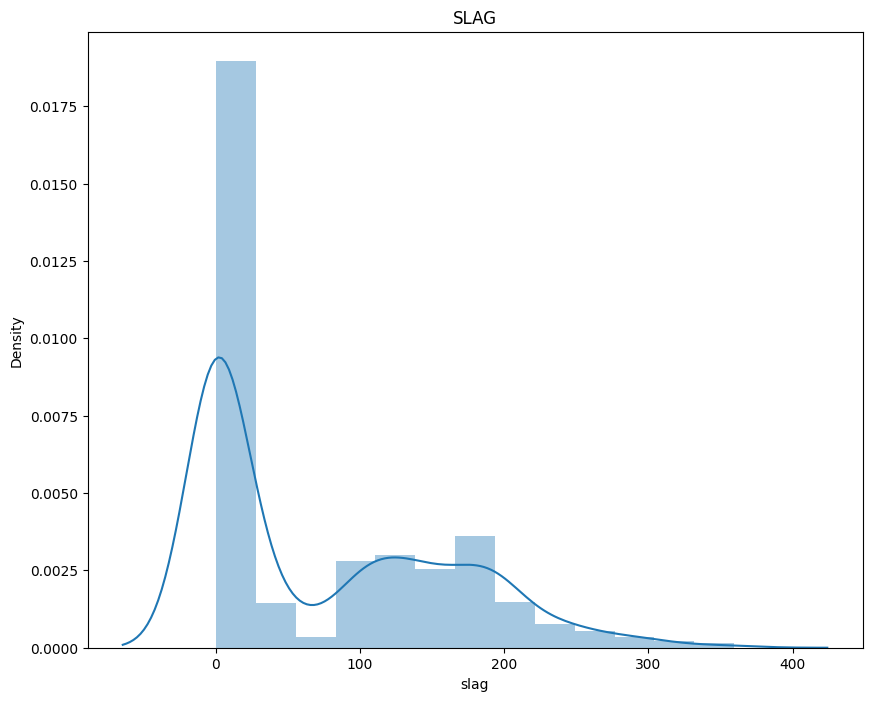

In [29]:
plt.figure(figsize=(10,8))
sns.distplot(df['slag']).set_title('SLAG')
plt.show()

### COARSE AGGREGATE

In [30]:
#Quartiles
Q1CA = df['coarseagg'].quantile(q=0.25)
Q3CA = df['coarseagg'].quantile(q=0.75)

print('1st Quartile is Q1: ', Q1CA)
print('3rd Quartile is Q3: ', Q3CA)
print('Interquartile range (IQR) is: ', stats.iqr(df['coarseagg']))

1st Quartile is Q1:  932.0
3rd Quartile is Q3:  1029.4
Interquartile range (IQR) is:  97.40000000000009


In [31]:
#Outlier detection from Interquartile range (IQR) in original data

CAL_outliers=Q1CA-1.5*(Q3CA-Q1CA)
CAL_outliers=Q3CA+1.5*(Q3CA-Q1CA)

print('Lower outlier in CA: ',CAL_outliers)
print('Upper outlier in CA: ',CAL_outliers)

Lower outlier in CA:  1175.5000000000002
Upper outlier in CA:  1175.5000000000002


# **MultiVaariate Analysis**

### Displot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-32-d31d34fd3476>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cement'],ax=ax2[0][0])


<IPython.core.display.Javascript object>

<ipython-input-32-d31d34fd3476>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['slag'],ax=ax2[0][2])


<IPython.core.display.Javascript object>

<ipython-input-32-d31d34fd3476>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ash'],ax=ax2[0][1])


<IPython.core.display.Javascript object>

<ipython-input-32-d31d34fd3476>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Water'],ax=ax2[1][0])


<IPython.core.display.Javascript object>

<ipython-input-32-d31d34fd3476>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['superplastic'],ax=ax2[1][1])


<IPython.core.display.Javascript object>

<ipython-input-32-d31d34fd3476>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['coarseagg'],ax=ax2[1][2])


<IPython.core.display.Javascript object>

<ipython-input-32-d31d34fd3476>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fineagg'],ax=ax2[2][0])


<IPython.core.display.Javascript object>

<ipython-input-32-d31d34fd3476>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],ax=ax2[2][1])


<IPython.core.display.Javascript object>

<ipython-input-32-d31d34fd3476>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['strength'],ax=ax2[2][2])


<Axes: xlabel='strength', ylabel='Density'>

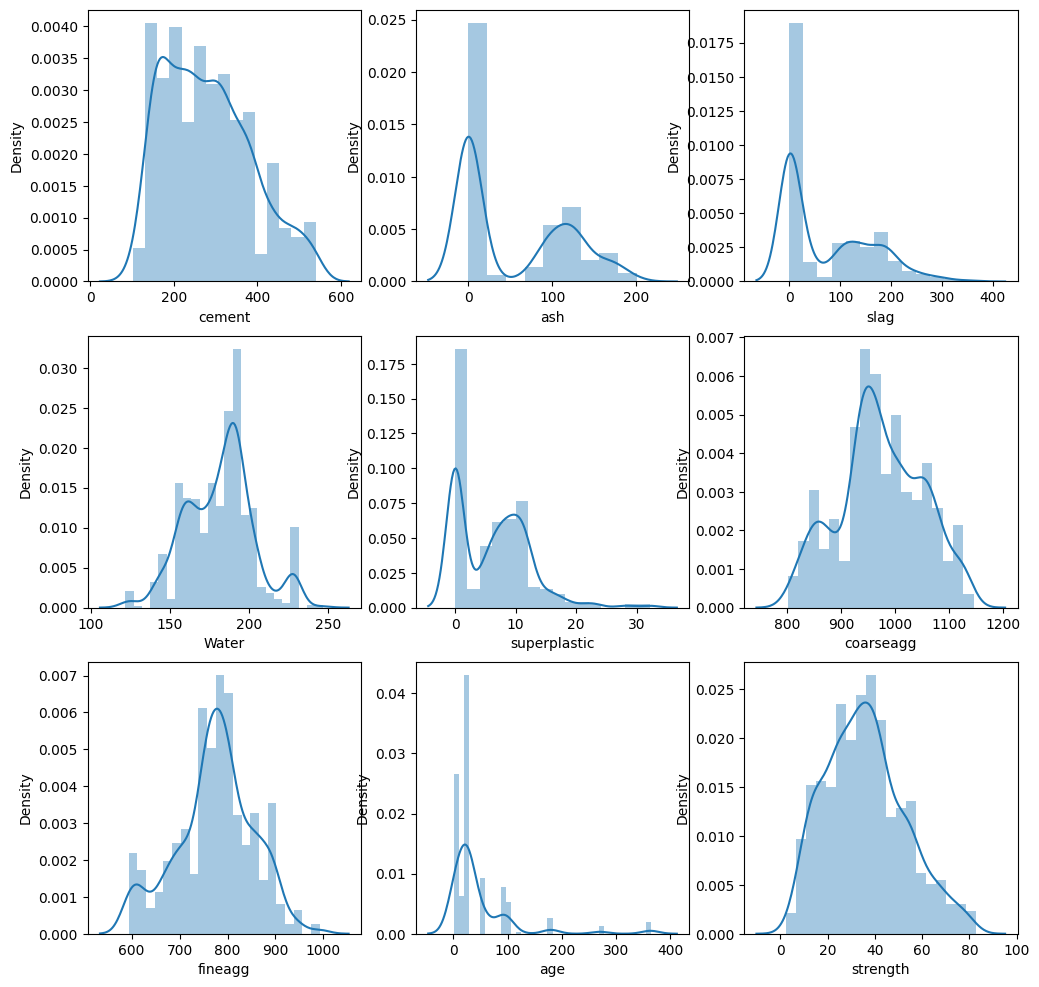

In [32]:
#Displot
# we can analysis the displot directly without exploratory analysis

fig,ax2 = plt.subplots(3,3,figsize=(12,12))
sns.distplot(df['cement'],ax=ax2[0][0])
sns.distplot(df['slag'],ax=ax2[0][2])
sns.distplot(df['ash'],ax=ax2[0][1])
sns.distplot(df['Water'],ax=ax2[1][0])
sns.distplot(df['superplastic'],ax=ax2[1][1])
sns.distplot(df['coarseagg'],ax=ax2[1][2])
sns.distplot(df['fineagg'],ax=ax2[2][0])
sns.distplot(df['age'],ax=ax2[2][1])
sns.distplot(df['strength'],ax=ax2[2][2])

### Pairplot

<IPython.core.display.Javascript object>

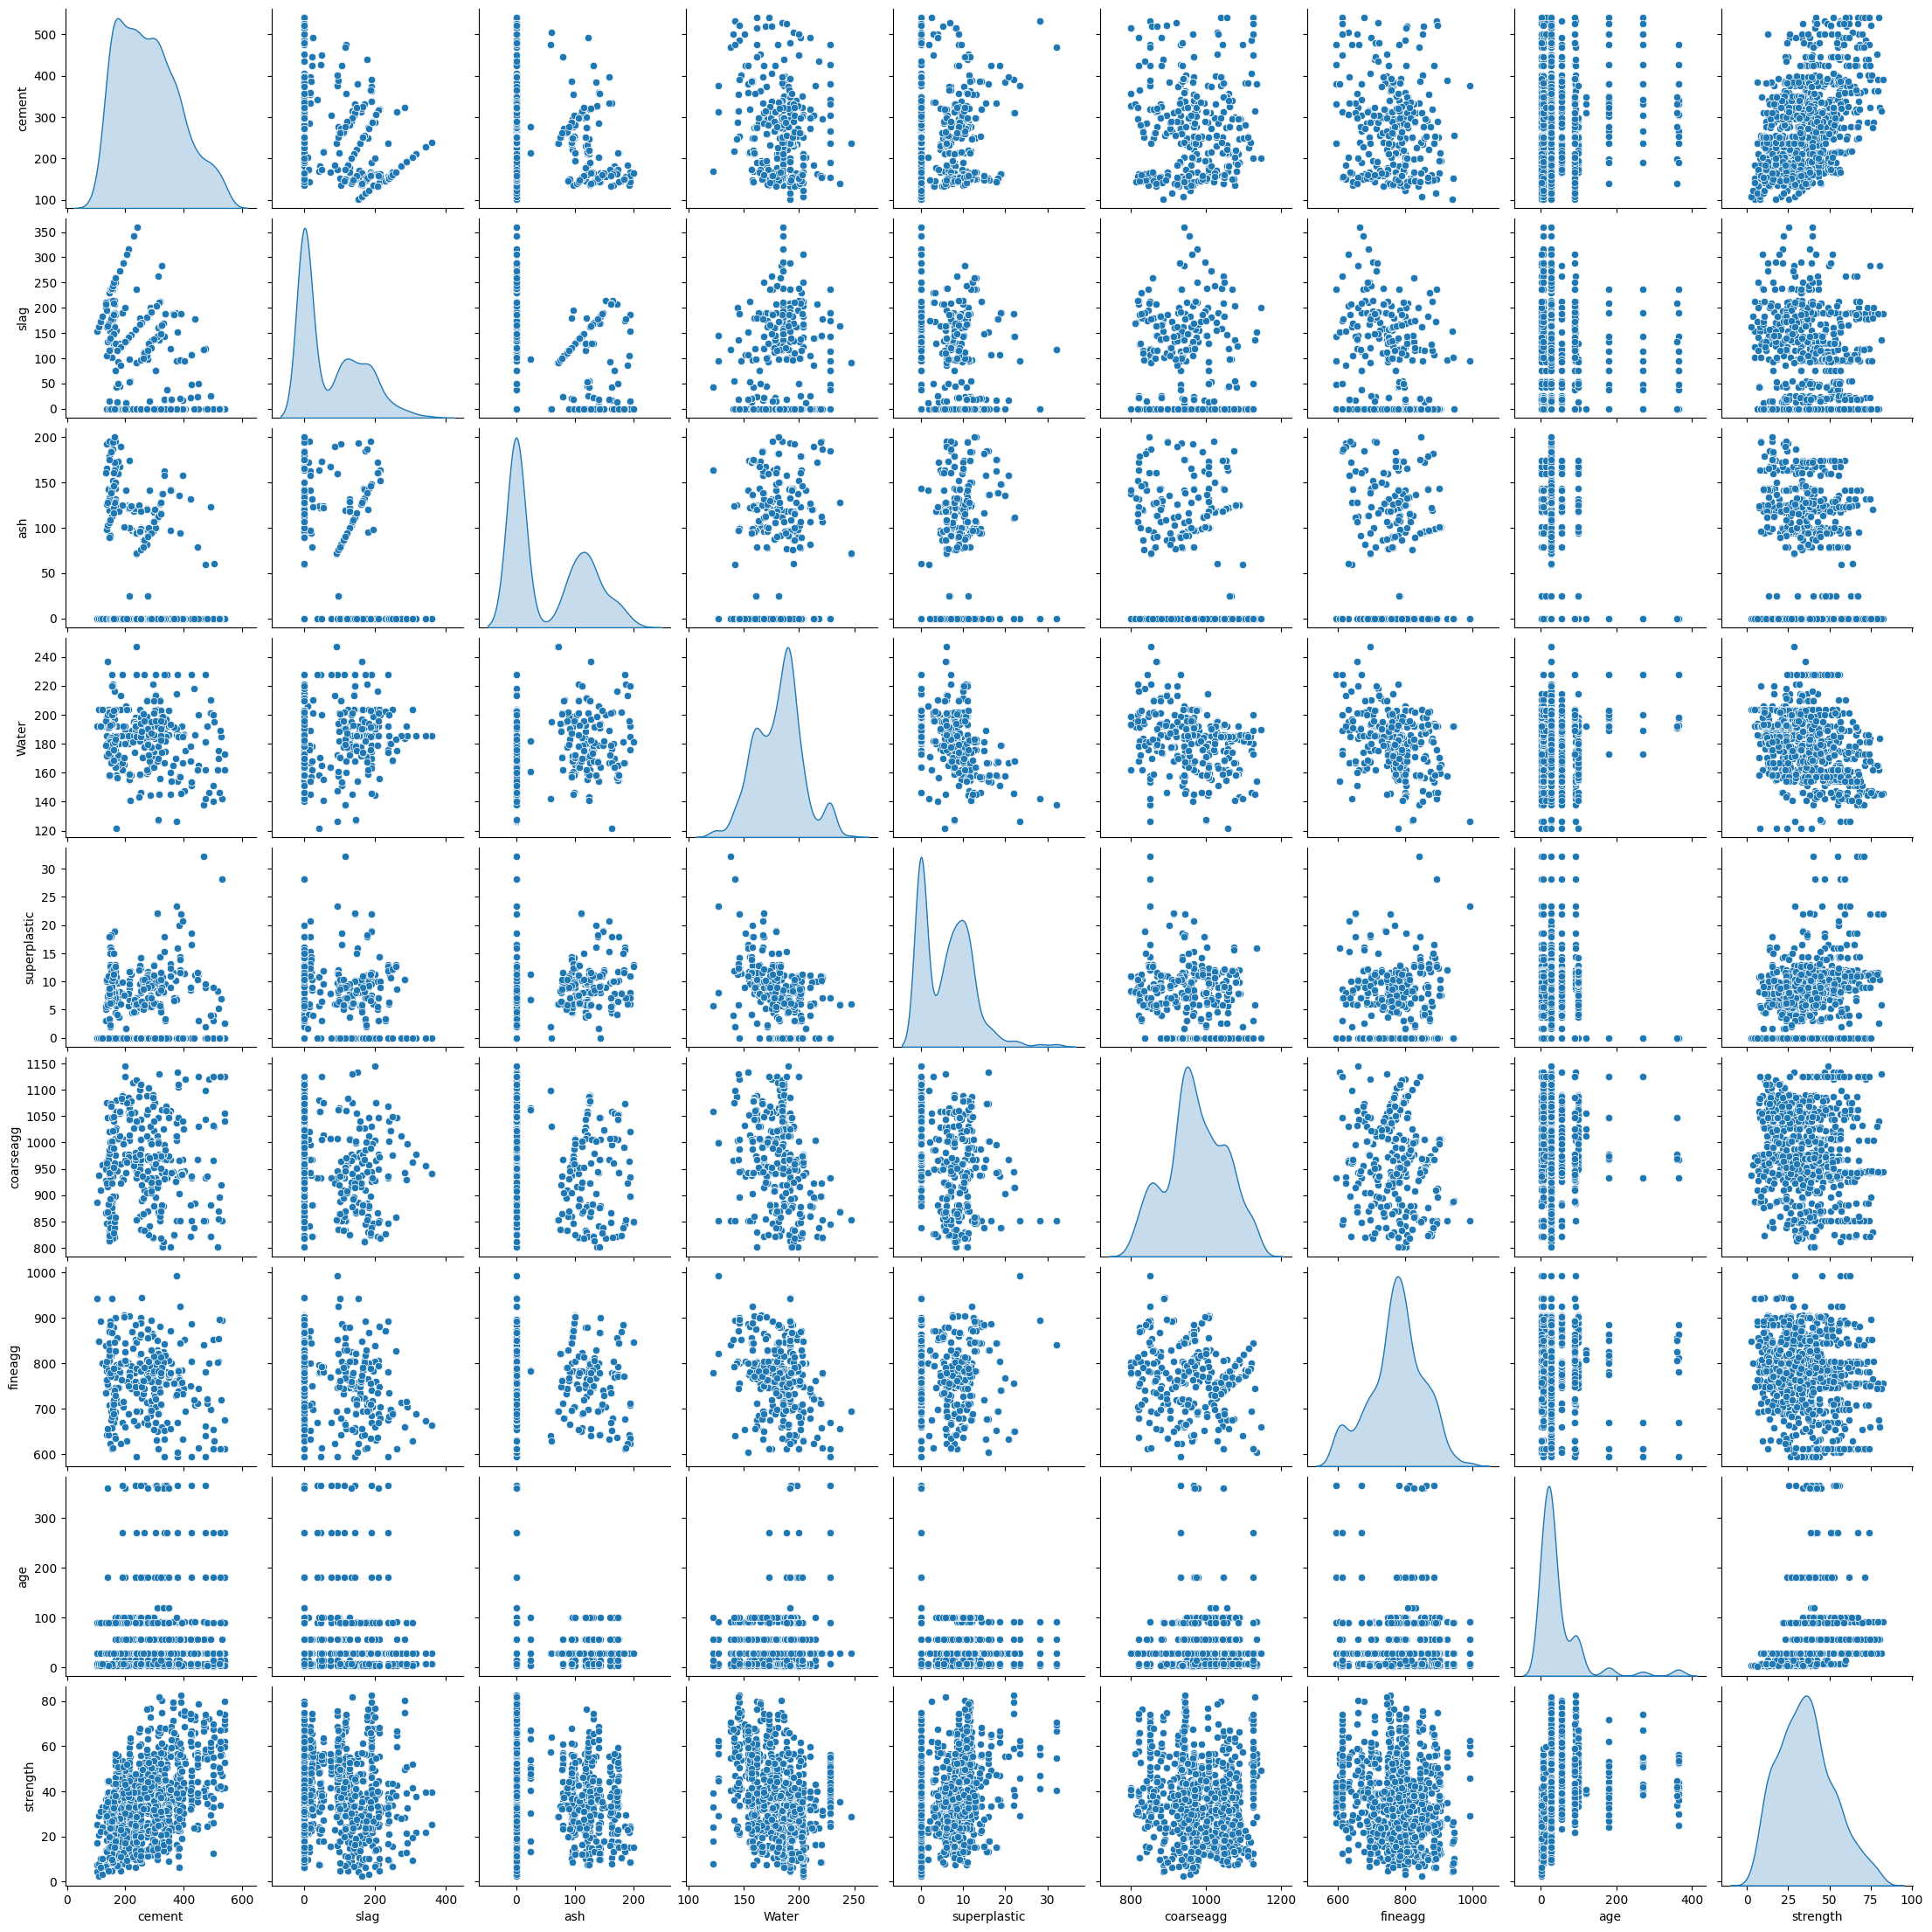

In [33]:
#This parameter specifies the type of plot to be used on the diagonal of the grid. 'kde' stands for kernel density estimate
#which provides a smoothed estimate of the distribution for each variable


sns.pairplot(df, diag_kind='kde')

### CoRelation Between Variables

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

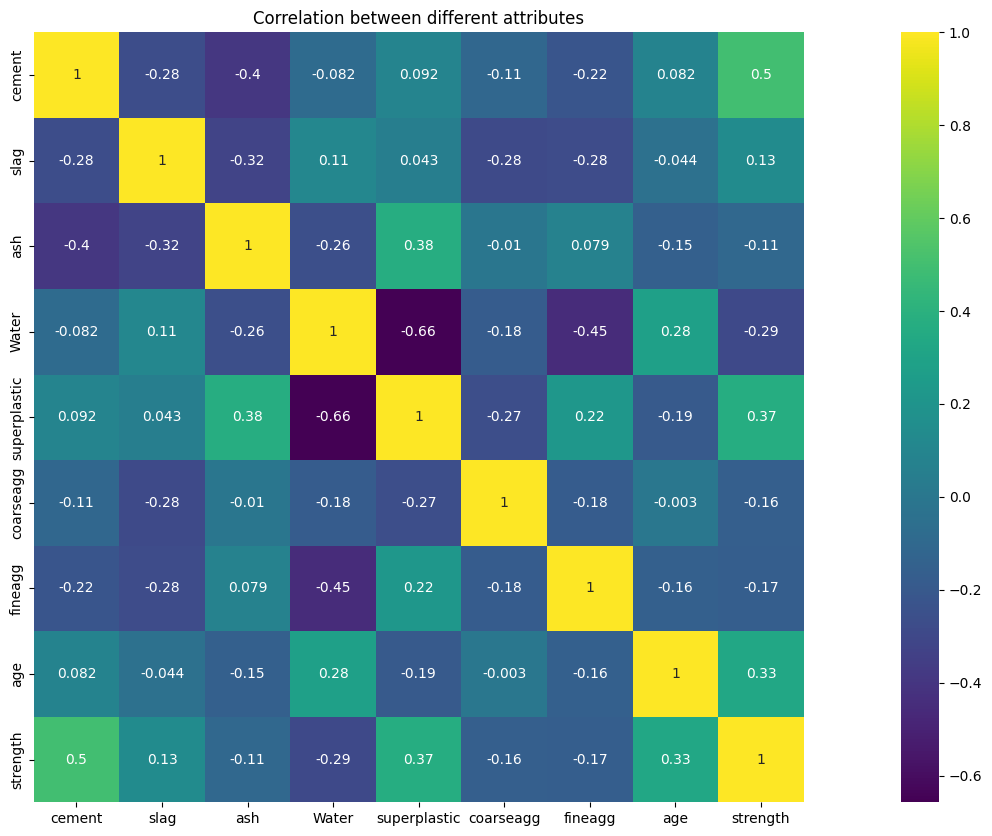

In [34]:
plt.figure(figsize=(25,10))

sns.heatmap(df.corr(),vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

### BOXPLOT

<Axes: >

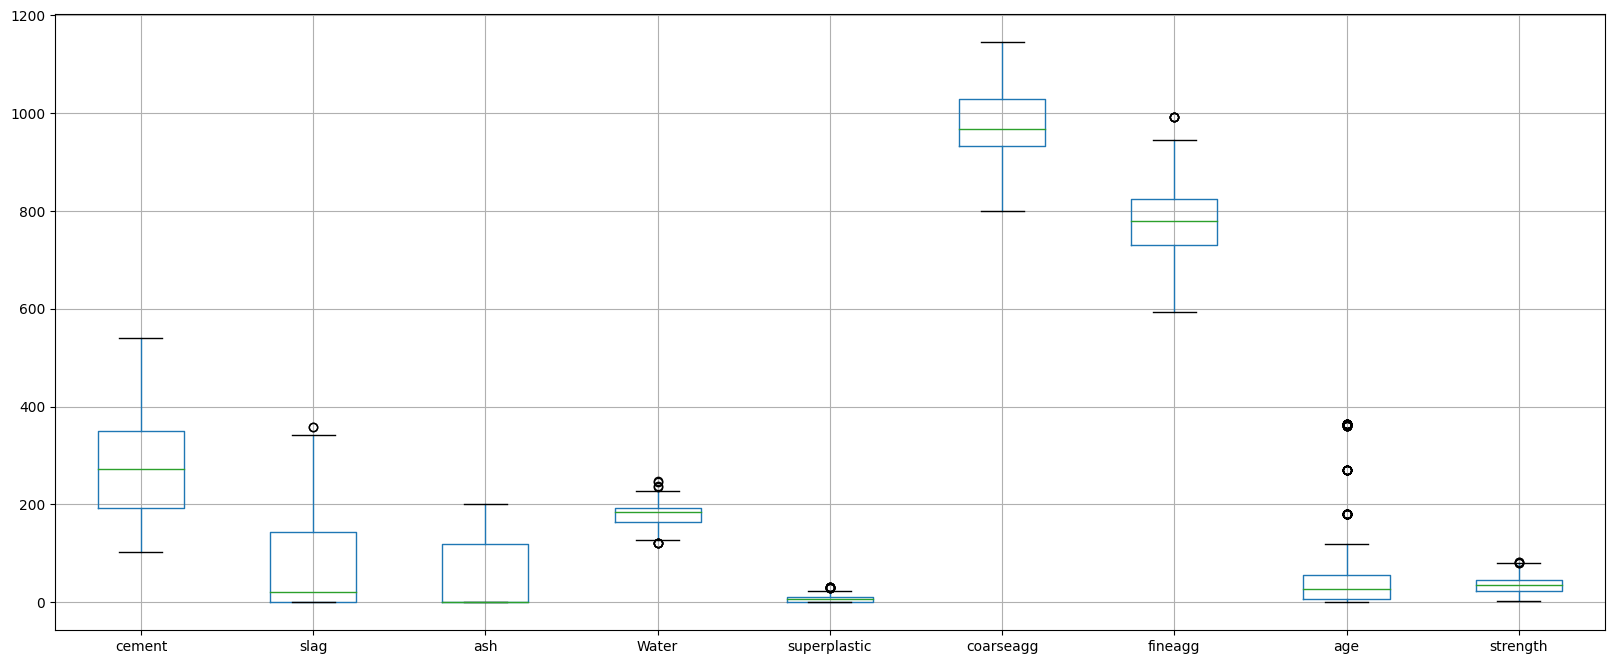

In [35]:
df.boxplot(figsize=(20,8))

In [36]:
## CHECKING THE OUTLIERS FOR ALL

print('Outliers in cement: ', df[((df.cement - df.cement.mean())/df.cement.std()).abs()>3]['cement'].count())
print('Outliers in slag: ', df[((df.slag - df.slag.mean())/df.slag.std()).abs()>3]['slag'].count())
print('Outliers in ash: ', df[((df.ash - df.ash.mean())/df.ash.std()).abs()>3]['ash'].count())
print('Outliers in water: ', df[((df.Water - df.Water.mean())/df.Water.std()).abs()>3]['Water'].count())
print('Outliers in superplastic: ', df[((df.superplastic - df.superplastic.mean())/df.superplastic.std()).abs()>3]['superplastic'].count())
print('Outliers in coarseagg: ', df[((df.coarseagg - df.coarseagg.mean())/df.coarseagg.std()).abs()>3]['coarseagg'].count())
print('Outliers in fineagg: ', df[((df.fineagg - df.fineagg.mean())/df.fineagg.std()).abs()>3]['fineagg'].count())
print('Outliers in age: ', df[((df.age - df.age.mean())/df.age.std()).abs()>3]['age'].count())

Outliers in cement:  0
Outliers in slag:  4
Outliers in ash:  0
Outliers in water:  2
Outliers in superplastic:  10
Outliers in coarseagg:  0
Outliers in fineagg:  0
Outliers in age:  33


### REPLACING THE OUTLIERS BY MEDIAN

In [37]:
for cols in df.columns[:-1]:
  Q1 = df[cols].quantile(0.25)
  Q3 = df[cols].quantile(0.75)
  iqr = Q3 - Q1

  low = Q1-1.5*iqr
  high = Q3+1.5*iqr
  df.loc[(df[cols] < low) | (df[cols] > high), cols] = df[cols].median()

<Axes: >

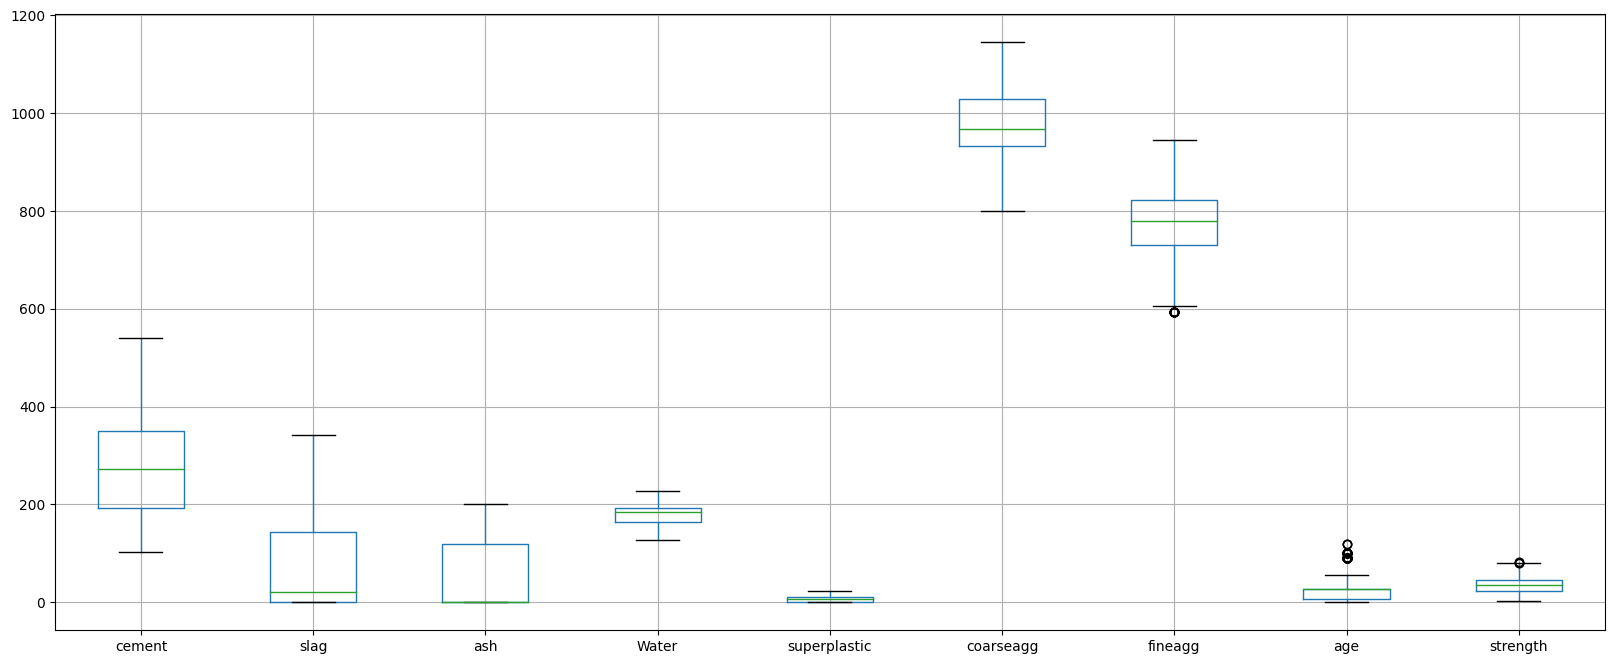

In [38]:
df.boxplot(figsize=(20,8))

# **Feature Engineering and Model Building**

In [39]:
df.head()

,cement,slag,ash,Water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.30


In [40]:
#Splitting the data into independent and dependent attributes
# here strength is the dependent(target, y) and others are independent(featured,x)


X = df.drop('strength', axis = 1)
y = df['strength']

In [41]:
from scipy.stats import zscore

Xscaled = X.apply(zscore)
Xscaled_df = pd.DataFrame(Xscaled, columns=df.columns)

#This code scales the feature variables using z-score normalization and creates a new DataFrame with the scaled features.
#Z-score normalization standardizes the data by transforming it to have a mean of 0 and a standard deviation of 1.

<IPython.core.display.Javascript object>

In [42]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, test_size= 0.3, random_state= 1)

<IPython.core.display.Javascript object>

# **Building Models**

## 1) RANDOM FOREST

In [296]:
#CREATE AND TRAIN THE MODEL

model = RandomForestRegressor()
model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor()

In [297]:
#Make prediction

y_pred = model.predict(X_test)

In [298]:
#Model Performance on Training Data

model.score(X_train, y_train)

#providing a measure of how well the model fits the training data.

# round(model.score(X_train, y_train)*100) #if you want to get the exact percentage, uncomment this one

0.9808348871606579

In [299]:
#Model Performance on Test Data

model.score(X_test, y_test)

#providing a measure of how well the model generalizes to new data

# round(model.score(X_test, y_test)*100) #if you want to get the exact percentage, uncomment this one

0.8775951125126011

In [300]:
#Calculate R^2 Score for Testing Data
acc_R=metrics.r2_score(y_test, y_pred)
acc_R

<IPython.core.display.Javascript object>

0.8775951125126011

In [301]:
#Calculate Mean Squared Error

metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

32.083202204874496

In [302]:
results_1 = pd.DataFrame({'Algorithm': ['Random Forest'], 'accuracy': [acc_R]}, index=[1])
results = results_1[['Algorithm', 'accuracy']]
print(results)


<IPython.core.display.Javascript object>

       Algorithm  accuracy
1  Random Forest  0.877595


KFold Cross Validation

In [303]:
# Initialize K-Fold Cross-Validation

k = 20

kfold = KFold(n_splits=k, random_state= None)
K_results = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

# cross-validation splitting strategy to use, in this case, the 20-fold cross-validation.
# either random= None or Shuffle= True

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7629263664760921

In [304]:
#Store the accuracy results for each model in a dataframe for final comparison

random_re = pd.DataFrame({'Algorithm': ['Random Forest Regressor k_fold'], 'accuracy': accuracy},index=['2'])
results = pd.concat([results, random_re])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877595
2,Random Forest Regressor k_fold,0.762926


## 2) Gradient Boosting Regressor

In [305]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

GradientBoostingRegressor()

In [306]:
y_pred = model.predict(X_test)

In [307]:
#Model Performance on Training Data

model.score(X_train, y_train)

0.9477368610390589

In [308]:
#Model Performance on Test Data

acc_G = model.score(X_test, y_test)
acc_G

0.8802197376916931

In [309]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

31.39526905072259

In [310]:
#Store the accuracy results for each model in a dataframe for final comparison

gradient_re = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor'], 'accuracy': acc_G},index=['3'])
results = pd.concat([results, gradient_re])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877595
2,Random Forest Regressor k_fold,0.762926
3,Gradient Boost Regressor,0.880220


In [311]:
k = 20

kfold = KFold(n_splits=k, random_state=None)
results_3 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_3))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7702311583125863

In [312]:
gradient_k = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor k fold'], 'accuracy': accuracy},index=['4'])
results = pd.concat([results, gradient_k])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877595
2,Random Forest Regressor k_fold,0.762926
3,Gradient Boost Regressor,0.880220
4,Gradient Boost Regressor k fold,0.770231


## 3) Ada Boost Regressor

In [313]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [314]:
y_pred= model.predict(X_test)

In [315]:
model.score(X_train, y_train)

0.8271542333111378

In [316]:
acc_ABR= model.score(X_test, y_test)
acc_ABR

0.7708625808995526

In [317]:
#Store the accuracy results for each model in a dataframe for final comparison

acc_ABR = pd.DataFrame({'Algorithm': ['Ada Boost Regressor'], 'accuracy': acc_ABR},index=['5'])
results = pd.concat([results, acc_ABR])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877595
2,Random Forest Regressor k_fold,0.762926
3,Gradient Boost Regressor,0.880220
4,Gradient Boost Regressor k fold,0.770231
5,Ada Boost Regressor,0.770863


In [318]:
k=20

kfold= KFold(n_splits=k, random_state= None)
results_4 = cross_val_score(model, X, y, cv= kfold)
accuracy= np.mean(abs(results_4))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.5959881015305019

In [319]:
acc_ABR_re = pd.DataFrame({'Algorithm': 'Ada Boost Regressor Kfold','accuracy': accuracy}, index=['6'])
results = pd.concat([results, acc_ABR_re])
results = results[['Algorithm','accuracy']]
results


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877595
2,Random Forest Regressor k_fold,0.762926
3,Gradient Boost Regressor,0.880220
4,Gradient Boost Regressor k fold,0.770231
5,Ada Boost Regressor,0.770863
6,Ada Boost Regressor Kfold,0.595988


## 4) KNN Regressor

In [320]:
#Checking for different values of neighbors to determine K
from sklearn.neighbors import KNeighborsRegressor


diff_k=[]
for i in range(1,45):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  diff_k.append(np.mean(pred_i != y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Mean errors')

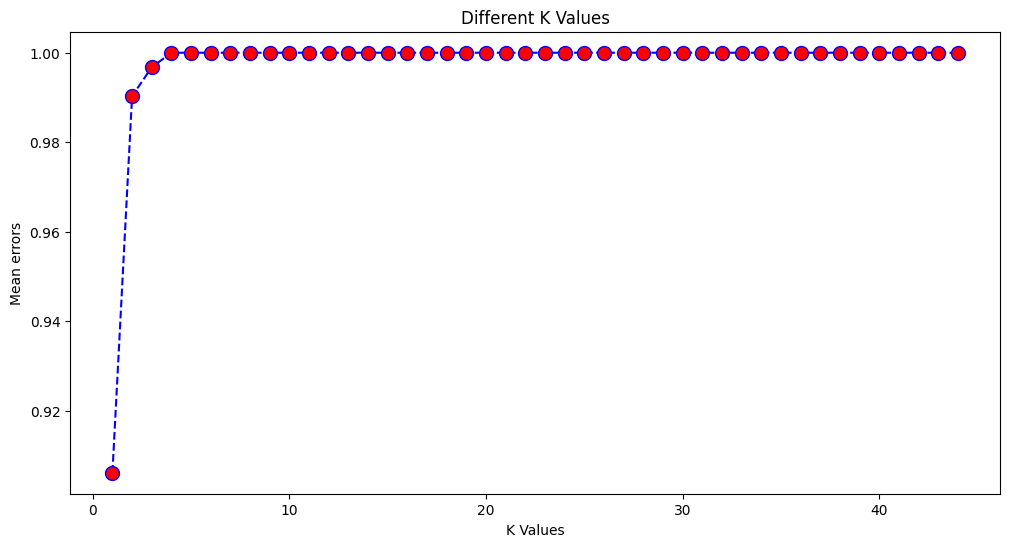

In [321]:
plt.figure(figsize=(12,6))
plt.plot(range(1,45),diff_k,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Different K Values')
plt.xlabel('K Values')
plt.ylabel('Mean errors')

In [322]:
#k=3 is a better choice from the above plot

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [323]:
y_pred = model.predict(X_test)

In [324]:
model.score(X_train, y_train)

0.9072386489998584

In [325]:
KNN= model.score(X_test, y_test)
KNN

0.7541705172196024

In [326]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

64.43367716648686

In [327]:
KNN_df = pd.DataFrame({'Algorithm':['KNN Regressor'], 'accuracy': [KNN]}, index=['7'])
results = pd.concat([results, KNN_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877595
2,Random Forest Regressor k_fold,0.762926
3,Gradient Boost Regressor,0.880220
4,Gradient Boost Regressor k fold,0.770231
5,Ada Boost Regressor,0.770863
6,Ada Boost Regressor Kfold,0.595988
7,KNN Regressor,0.754171


In [328]:
k = 20

kfold = KFold(n_splits=k, random_state=None)
results_5 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_5))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.6913851078857276

In [329]:
#Store the accuracy results for each model in a dataframe for final comparison

KNNfold_df = pd.DataFrame({'Algorithm': ['KNN Regressor k fold'], 'accuracy': accuracy},index=['8'])
results = pd.concat([results, KNNfold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877595
2,Random Forest Regressor k_fold,0.762926
3,Gradient Boost Regressor,0.880220
4,Gradient Boost Regressor k fold,0.770231
5,Ada Boost Regressor,0.770863
6,Ada Boost Regressor Kfold,0.595988
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385


## 5) Bagging Reggressor

In [330]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor()
model.fit(X_train,y_train)

BaggingRegressor()

In [331]:
y_pred = model.predict(X_test)
model.score(X_train, y_train)

0.9728205330814965

In [332]:
acc_BR= model.score(X_test, y_test)
acc_BR

0.8662478557475357

In [333]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

35.05739989205181

In [334]:
#Store the accuracy results for each model in a dataframe for final comparison

Bagging_df = pd.DataFrame({'Algorithm': ['Bagging Regressor'], 'accuracy': acc_BR},index=['9'])
results = pd.concat([results, Bagging_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877595
2,Random Forest Regressor k_fold,0.762926
3,Gradient Boost Regressor,0.880220
4,Gradient Boost Regressor k fold,0.770231
5,Ada Boost Regressor,0.770863
6,Ada Boost Regressor Kfold,0.595988
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.866248


In [335]:
k = 20

kfold = KFold(n_splits=k, random_state=None)
results_7 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_7))

#Store the accuracy results for each model in a dataframe for final comparison

BaggingKFold_df = pd.DataFrame({'Algorithm': ['Bagging Regressor k fold'], 'accuracy': accuracy},index=['10'])
results = pd.concat([results, BaggingKFold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877595
2,Random Forest Regressor k_fold,0.762926
3,Gradient Boost Regressor,0.880220
4,Gradient Boost Regressor k fold,0.770231
5,Ada Boost Regressor,0.770863
6,Ada Boost Regressor Kfold,0.595988
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.866248
10,Bagging Regressor k fold,0.749446


## 6) Support Vector Regressor

In [336]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [337]:
model.score(X_train, y_train)

0.7296525761559518

In [338]:
acc_SVR=metrics.r2_score(y_test, y_pred)
acc_SVR

#or I can write, model.score(X_test, y_test), because it will create a same value

<IPython.core.display.Javascript object>

0.6549962611822544

In [339]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

90.42796363067555

In [340]:
#Store the accuracy results for each model in a dataframe for final comparison

SVR_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor'], 'accuracy': acc_SVR},index=['11'])
results = pd.concat([results, SVR_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877595
2,Random Forest Regressor k_fold,0.762926
3,Gradient Boost Regressor,0.880220
4,Gradient Boost Regressor k fold,0.770231
5,Ada Boost Regressor,0.770863
6,Ada Boost Regressor Kfold,0.595988
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.866248
10,Bagging Regressor k fold,0.749446


## 7) XGBoost Regressor

In [341]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr = XGBRegressor()

xgr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [342]:
y_pred = xgr.predict(X_test)
xgr.score(X_train, y_train)

0.992400687042809

In [343]:
acc_XGB=metrics.r2_score(y_test, y_pred)
acc_XGB

<IPython.core.display.Javascript object>

0.8848170780709802

In [344]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

30.19027304099638

In [345]:
#Store the accuracy results for each model in a dataframe for final comparison

XGB_df = pd.DataFrame({'Algorithm': ['XG Boost Regressor'], 'accuracy': [acc_XGB]},index=['13'])
results = pd.concat([results, XGB_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877595
2,Random Forest Regressor k_fold,0.762926
3,Gradient Boost Regressor,0.880220
4,Gradient Boost Regressor k fold,0.770231
5,Ada Boost Regressor,0.770863
6,Ada Boost Regressor Kfold,0.595988
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.866248
10,Bagging Regressor k fold,0.749446


## 8) DesionTreeRegressor

In [346]:
from sklearn.tree import DecisionTreeRegressor

dec_model = DecisionTreeRegressor()
dec_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [347]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)

print('Feature importance: \n',pd.DataFrame(dec_model.feature_importances_,columns=['Importance'],index=X_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
               Importance
cement          0.309917
slag            0.059813
ash             0.010216
Water           0.123089
superplastic    0.047409
coarseagg       0.027506
fineagg         0.049091
age             0.372961


In [348]:
y_pred = dec_model.predict(X_test)
dec_model.score(X_train, y_train)

0.9930841416603411

In [349]:
acc_DT= dec_model.score(X_test, y_test)
acc_DT

# or acc_DT=metrics.r2_score(y_test, y_pred)

0.7632545461332985

In [350]:
#Store the accuracy results for each model in a dataframe for final comparison

DT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 1'], 'accuracy': [acc_DT]},index=['14'])
results = pd.concat([results, DT_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877595
2,Random Forest Regressor k_fold,0.762926
3,Gradient Boost Regressor,0.880220
4,Gradient Boost Regressor k fold,0.770231
5,Ada Boost Regressor,0.770863
6,Ada Boost Regressor Kfold,0.595988
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.866248
10,Bagging Regressor k fold,0.749446


In [351]:
k = 20

kfold = KFold(n_splits=k, random_state=None)
results_9 = cross_val_score(dec_model, X, y, cv=kfold)
accuracy=np.mean(abs(results_9))

#Store the accuracy results for each model in a dataframe for final comparison

DCT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor k fold'], 'accuracy': accuracy},index=['15'])
results = pd.concat([results, DCT_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877595
2,Random Forest Regressor k_fold,0.762926
3,Gradient Boost Regressor,0.880220
4,Gradient Boost Regressor k fold,0.770231
5,Ada Boost Regressor,0.770863
6,Ada Boost Regressor Kfold,0.595988
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.866248
10,Bagging Regressor k fold,0.749446


## Important FEATURE SELECTION, then DTR again

In [352]:
df2 = df.copy()

#create a copy of df in order to drop the least important features and work on only the important features

In [353]:
X = df2.drop(['strength','ash','coarseagg','fineagg'],axis=1)
y = df2['strength']
#Split the X and y into training and test set in 70:30 ratio
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3,random_state = 1)

<IPython.core.display.Javascript object>

In [354]:
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

### 9) Decision tree regressor 2

In [355]:
decNew_Model = DecisionTreeRegressor()
decNew_Model.fit(X_train, y_train)

DecisionTreeRegressor()

In [356]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)

print('Feature importance: \n',pd.DataFrame(decNew_Model.feature_importances_,columns=['Importance'],index=X_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
               Importance
cement          0.350583
slag            0.075512
Water           0.140337
superplastic    0.056420
age             0.377148


In [357]:
y_pred = decNew_Model.predict(X_test)

decNew_Model.score(X_train, y_train)

0.9911889880235539

In [358]:
acc_DT= decNew_Model.score(X_test, y_test)
acc_DT

0.7345350959322327

In [359]:
#Store the accuracy results for each model in a dataframe for final comparison

DT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 2'], 'accuracy': [acc_DT]},index=['16'])
results = pd.concat([results, DT_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877595
2,Random Forest Regressor k_fold,0.762926
3,Gradient Boost Regressor,0.880220
4,Gradient Boost Regressor k fold,0.770231
5,Ada Boost Regressor,0.770863
6,Ada Boost Regressor Kfold,0.595988
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.866248
10,Bagging Regressor k fold,0.749446


In [360]:
#Let's create our training and testing data again since it has been overriden

X=df.drop('strength',axis=1)
y=df['strength']

In [361]:
Xscaled=X.apply(zscore)
Xscaled_df=pd.DataFrame(Xscaled,columns=df.columns)

<IPython.core.display.Javascript object>

In [362]:
#Split the X and y into training and test set in 70:30 ratio

X_train,X_test, y_train,y_test = train_test_split(Xscaled,y, test_size=0.3,random_state = 1)

<IPython.core.display.Javascript object>

### Pruned Decision Tree Regressor

In [363]:
dec_prun_model=DecisionTreeRegressor(max_depth=4, random_state=1,min_samples_leaf=5)
dec_prun_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [364]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)

print('Feature importance: \n',pd.DataFrame(dec_prun_model.feature_importances_,columns=['Importance'],index=X_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
               Importance
cement          0.355615
slag            0.000000
ash             0.000000
Water           0.106034
superplastic    0.035409
coarseagg       0.000000
fineagg         0.025055
age             0.477887


Plotting the decision tree

In [365]:
!pip install graphviz
!pip install pydot

In [366]:
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

# Your code using export_graphviz and pydotplus to visualize decision tree goes here...

In [367]:
Xscaled_df=Xscaled_df.drop('strength',axis=1)
feature_cols = Xscaled_df.columns

In [368]:
feature_cols

Index(['cement', 'slag', 'ash', 'Water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')

<IPython.core.display.Javascript object>

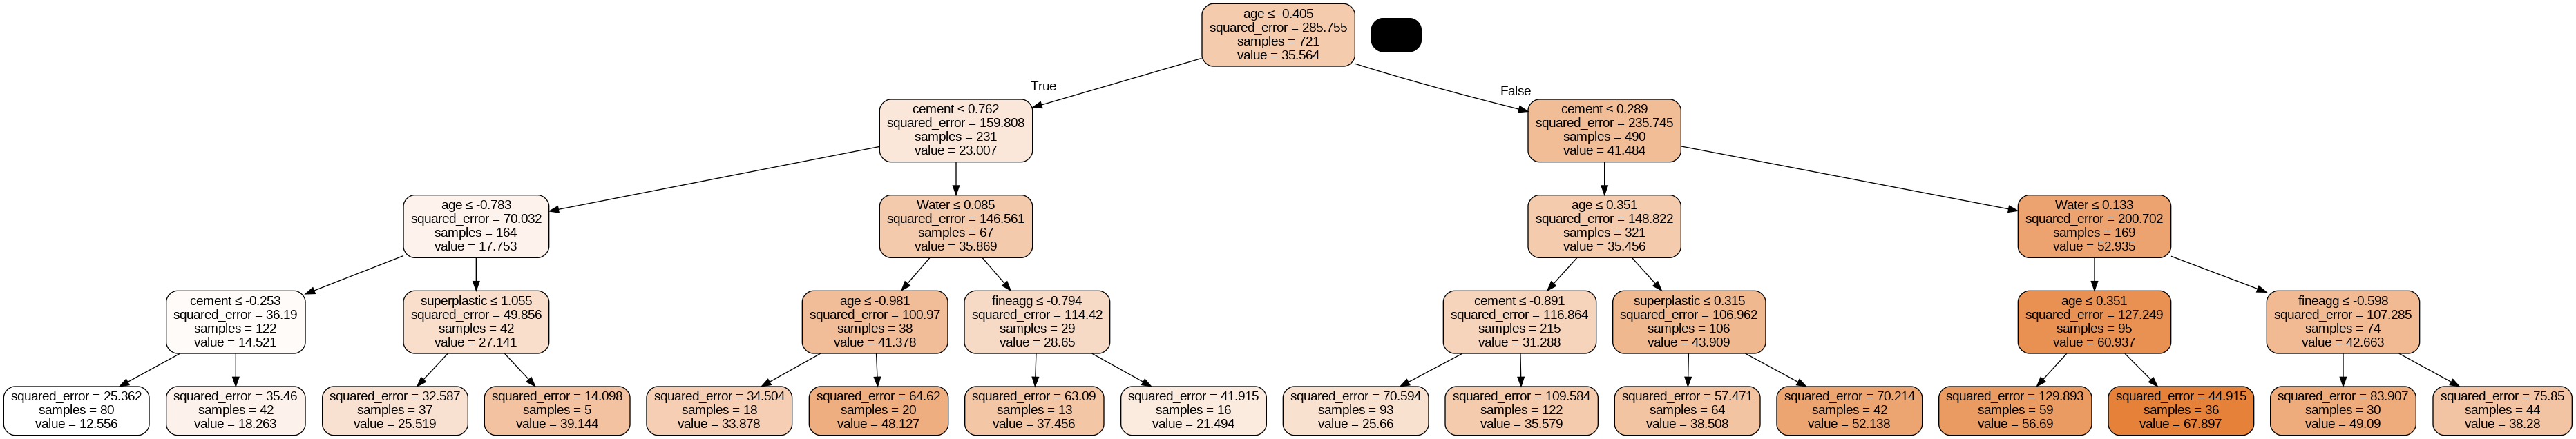

In [369]:
dot_data = StringIO()
export_graphviz(dec_prun_model,out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,class_names=['0','1'])
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png('concrete_pruned.png')
Image(graph.create_png())

In [370]:
y_pred = dec_prun_model.predict(X_test)
dec_prun_model.score(X_train, y_train)

0.7578225840644413

In [371]:
acc_DecT= dec_prun_model.score(X_test, y_test)
acc_DecT

0.556820999525816

In [372]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

116.16040647585388

In [373]:
#Store the accuracy results for each model in a dataframe for final comparison

DecT_df = pd.DataFrame({'Algorithm': ['Pruned Decision Tree'], 'accuracy': [acc_DecT]},index=['17'])
results = pd.concat([results, DecT_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877595
2,Random Forest Regressor k_fold,0.762926
3,Gradient Boost Regressor,0.880220
4,Gradient Boost Regressor k fold,0.770231
5,Ada Boost Regressor,0.770863
6,Ada Boost Regressor Kfold,0.595988
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.866248
10,Bagging Regressor k fold,0.749446


In [374]:
k = 20

kfold = KFold(n_splits=k, random_state=None)
results_10 = cross_val_score(dec_prun_model, X, y, cv=kfold)
accuracy=np.mean(abs(results_10))

#Store the accuracy results for each model in a dataframe for final comparison

decKFold_df = pd.DataFrame({'Algorithm': ['Pruned Decision Tree k fold'], 'accuracy': accuracy},index=['18'])
results = pd.concat([results, decKFold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.877595
2,Random Forest Regressor k_fold,0.762926
3,Gradient Boost Regressor,0.880220
4,Gradient Boost Regressor k fold,0.770231
5,Ada Boost Regressor,0.770863
6,Ada Boost Regressor Kfold,0.595988
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.866248
10,Bagging Regressor k fold,0.749446


# Comment: The model with higher R2 scores and lower MSE is generally considered better. Cross-validation results add robustness to your conclusions by ensuring the model performs well across different splits of the data.From my analysis: Random Forest Regressor, Gradient Boost Regressor, XG Boost Regressor, Bragging Regressor will perform well.